In [71]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
path ='../data.csv'
df = pd.read_csv(path)
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6043 entries, 0 to 6042
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   car_name        6034 non-null   object
 1   year            6043 non-null   object
 2   price           6043 non-null   object
 3   assemble_place  6043 non-null   object
 4   series          6043 non-null   object
 5   driven kms      6043 non-null   int64 
 6   num_of_door     6043 non-null   int64 
 7   num_of_seat     6043 non-null   int64 
 8   engine_type     6043 non-null   object
 9   transmission    6043 non-null   object
 10  url             6043 non-null   object
dtypes: int64(3), object(8)
memory usage: 519.4+ KB


,driven kms,num_of_door,num_of_seat
count,6.043000e+03,6043.000000,6043.000000
mean,5.962190e+04,4.530035,5.501738
std,2.087370e+05,0.777806,1.293347
min,1.000000e+00,1.000000,2.000000
25%,2.200000e+04,4.000000,5.000000
50%,4.600000e+04,5.000000,5.000000
75%,7.000000e+04,5.000000,5.000000
max,8.400039e+06,45.000000,29.000000


In [73]:
def describle_data():
    print('Shape of data:\n', df.shape)
    print('--'*20)
    print('Columns of data: \n', df.columns)
    print('--'*20)
    print('Data types of data: \n', df.dtypes)
    print('--'*20)
    print('Missing values of data: \n', df.isnull().sum())
    print('--'*20)
    print('Describe data: \n', df.describe())
    print('--'*20)
    print('Info data: \n', df.info())
describle_data()

Shape of data:
 (6043, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name          object
year              object
price             object
assemble_place    object
series            object
driven kms         int64
num_of_door        int64
num_of_seat        int64
engine_type       object
transmission      object
url               object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          9
year              0
price             0
assemble_place    0
series            0
driven kms        0
num_of_door       0
num_of_seat       0
engine_type       0
transmission      0
url               0
dtype: int64
----------------------------------------
Describe data: 
          driven kms  num_of

In [74]:
def process_year_colum(year):
    if year.isdigit():
        return int(year)
    else:
        return 0
df['year'] = df['year'].astype(str).apply(process_year_colum)
describle_data()

Shape of data:
 (6043, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name          object
year               int64
price             object
assemble_place    object
series            object
driven kms         int64
num_of_door        int64
num_of_seat        int64
engine_type       object
transmission      object
url               object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          9
year              0
price             0
assemble_place    0
series            0
driven kms        0
num_of_door       0
num_of_seat       0
engine_type       0
transmission      0
url               0
dtype: int64
----------------------------------------
Describe data: 
               year    drive

In [75]:
def process_price(price):
    try:
        if price.find('Tỷ') != -1:
            ty= price.split('Tỷ')[0]
            trieu = price.split('Tỷ')[1]
            trieu = trieu.split('Triệu')[0]
            return float(ty)*1000000000 + float(trieu)*1000000
        elif price.find('Triệu') != -1:
            trieu = price.split('Triệu')[0]
            trieu = trieu.replace(' ','')
            return float(trieu)*1000000
        else:
            print(price)
            return 0
    except:
        print(price)
        return 0
df['price'] = df['price'].astype(str).apply(process_price)

Line 1.6T AWD 
						2022
						
 1 Tỷ
S 1.5 CVT 
						2021
						
X 
						1.9 4X2 AT 
						2019
						
X 
						1.9 4X2 AT 
						2019
						
 1 Tỷ
Line Quattro 
						2020
						
 18 Tỷ
Sport 
						2021
						
 11 Tỷ
IVI 2.5 AT 2WD 
						2020
						
Dynamic SE 2.0 
						2019
						
S 1.5 CVT 
						2021
						
Line 2.0G 
						2022
						
 16 Tỷ
 13 Tỷ
 6 Tỷ
IVI 2.5 AT 4WD 
						2020
						
spec 2.5 AT 
						2004
						
Sport 
						2015
						
AWD 
						2011
						
Dynamic SE 2.0 
						2019
						
X 
						2.5 4X2 MT 
						2016
						
Activ 
						2021
						
Activ 
						2021
						
L 2.4 AT 
						2013
						
L 2.4 AT 
						2013
						
Line 2.0G 
						2022
						
Line 
						2021
						
Line 
						2021
						
Line 
						2021
						
Activ 
						2019
						
Dynamic 2.0 
						2018
						
Line 
						2022
						
Spec 2.5MT 
						2007
						
Dynamic 2.0 
						2018
						
Line 
						2020
						
Dynamic 2.0 
						2019
						
Dynamic 2.0 
						2019
						
Line 2.0G 


In [77]:
describle_data()

Shape of data:
 (6043, 11)
----------------------------------------
Columns of data: 
 Index(['car_name', 'year', 'price', 'assemble_place', 'series', 'driven kms',
       'num_of_door', 'num_of_seat', 'engine_type', 'transmission', 'url'],
      dtype='object')
----------------------------------------
Data types of data: 
 car_name           object
year                int64
price             float64
assemble_place     object
series             object
driven kms          int64
num_of_door         int64
num_of_seat         int64
engine_type        object
transmission       object
url                object
dtype: object
----------------------------------------
Missing values of data: 
 car_name          9
year              0
price             0
assemble_place    0
series            0
driven kms        0
num_of_door       0
num_of_seat       0
engine_type       0
transmission      0
url               0
dtype: int64
----------------------------------------
Describe data: 
               ye

In [84]:
df['year'].value_counts()
# if year <= 1900 then replace by mean of year
df['year'] = df['year'].apply(lambda x: df['year'].mean() if x <= 1900 else x)


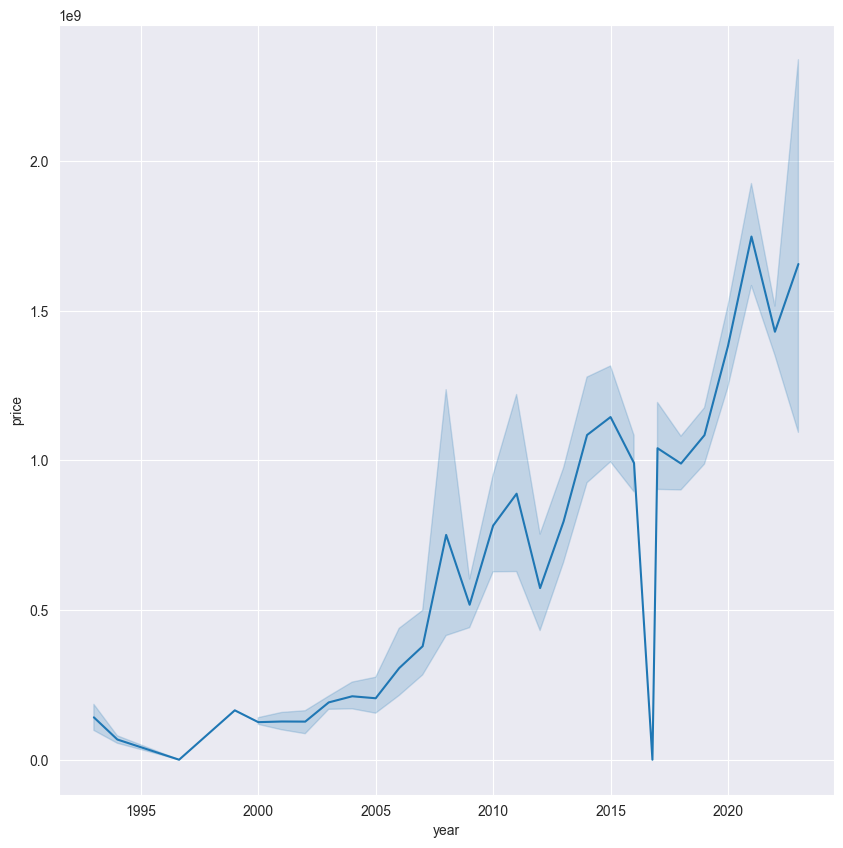

In [86]:
plt.figure(figsize=(10,10))
#plot price by year
sns.lineplot(x='year', y='price', data=df)
plt.show()
